In [89]:
import torch
import torchvision 
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import numpy as np
import pandas as pd

In [59]:
import warnings
warnings.filterwarnings('ignore')

# Setting Up Data
### Downloading, Loading into Dataloader, shuffling and splitting into batches

In [60]:
#setupData
train = datasets.MNIST('./Datasets/', train=True, download=True, transform = transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST('./Datasets/', train=False, download=True, transform = transforms.Compose([transforms.ToTensor()]))

trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

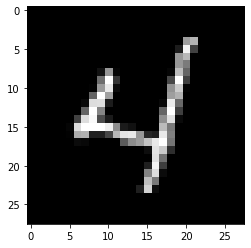

In [61]:
for data in trainset:
    plt.imshow(data[0][0].view(28,28),cmap='gray')
    plt.show()
    break

In [62]:
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}


for data in trainset:
    Xs, ys = data
    for y in ys:
        counter_dict[int(y)] += 1
        total += 1

# The Neural Net

## Creating The Neural Net

In [149]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [150]:
X = torch.rand(28,28)
X = X.view(-1,28*28)
X.shape

torch.Size([1, 784])

In [151]:
output = net(X)
output

tensor([[-2.2842, -3.6219, -2.8461, -2.2089, -2.4382, -1.9622, -2.7118, -2.3330,
         -2.1726, -1.6177]], grad_fn=<LogSoftmaxBackward>)

## Training The Neural Net

In [152]:
#Training Net
from torch import optim

loss = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(),lr=0.001)

EPOCH = 8
losses = []
for epoch in tqdm(range(EPOCH), desc="Total Progress of EPOCHS"):

    for data in tqdm(trainset, leave=False, desc=f'Epoch {epoch + 1} '):
        X, y = data
        net.zero_grad()
        output = net(X.view(-1,28*28))
        loss = F.nll_loss(output, y)
        losses.append(loss)
        loss.backward()
        optimizer.step()
    print('Loss after Epoch ',epoch,' : ',float(loss))

Loss after Epoch  0  :  0.4986557364463806


Loss after Epoch  1  :  0.023481834679841995


Loss after Epoch  2  :  0.0020472381729632616


Loss after Epoch  3  :  0.04035045951604843


Loss after Epoch  4  :  0.007017788477241993


Loss after Epoch  5  :  0.3589421808719635


Loss after Epoch  6  :  0.0023292519617825747


Loss after Epoch  7  :  0.0014206046471372247



## Visualizing loss over iterations

Text(0, 0.5, 'Loss')

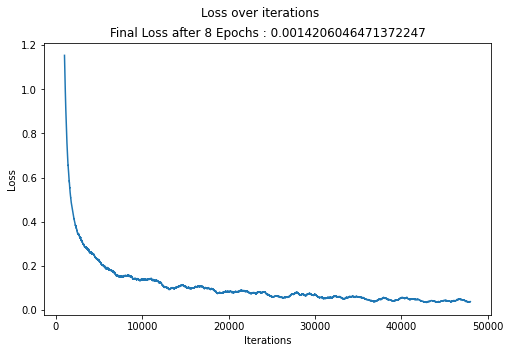

In [153]:
df = pd.DataFrame({'losses' : losses})
df['losses'].rolling(window=1000).mean().plot(figsize=(8,5))
plt.title(f"Final Loss after {EPOCH} Epochs : {losses[-1]}")
plt.xlabel("Iterations")
plt.suptitle("Loss over iterations")
plt.ylabel("Loss")

## Testing The Neural Net

In [67]:
correct = 0
total = 0

incorrect = []

with torch.no_grad():
    print("Testing")
    for data in tqdm(testset):
        X, y = data
        output = net(X.view(-1,784))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            else :
                incorrect.append((X[idx].view(28,28),torch.argmax(i),y[idx]))
            total += 1

print("Correct: ",correct)
print("Incorrect: ",total - correct)
print("Accuracy: ", round(correct/total, 3))

Testing



Correct:  9189
Incorrect:  811
Accuracy:  0.919


In [68]:
def predict(no=0):
    a_featureset = X[no]
    reshaped_for_network = a_featureset.view(-1,784)
    output = net(reshaped_for_network)
    first_pred = output[0]
    return int(torch.argmax(first_pred))

# Visualizing the output

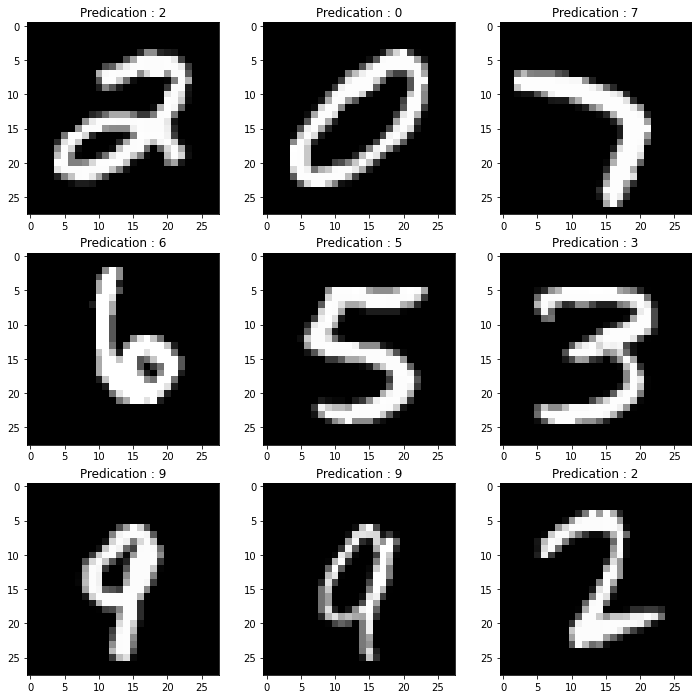

In [69]:
get_no = lambda no : (int(no / 3), no % 3)
figure = plt.figure(figsize=(12,12))
axs = figure.subplots(nrows=3,ncols=3,) 

for i in range(9):
    predication = predict(i)
    axs[get_no(i)].imshow(X[i].view(28,28), cmap='gray')
    axs[get_no(i)].set(title = f'Predication : {predication}')
    
figure.show()

# The Incorrect Predications

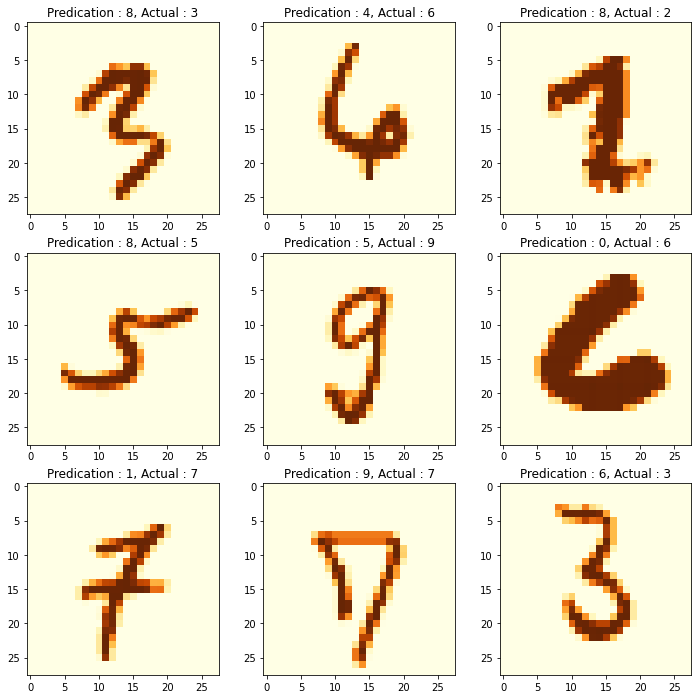

In [70]:
get_no = lambda no : (int(no / 3), no % 3)
figure = plt.figure(figsize=(12,12))
axs = figure.subplots(nrows=3,ncols=3,) 

for i in range(9):
    predication = predict(i)
    axs[get_no(i)].imshow(incorrect[i][0],cmap='YlOrBr')
    axs[get_no(i)].set(title = f'Predication : {incorrect[i][1]}, Actual : {incorrect[i][2]}')
    
figure.show()